## Visualizations Tutorial

This notebook provides examples on how to carry out data visualization using the post_processing python library. Be sure to go through the [Quick Start](https://nhs-postprocessing.readthedocs.io/en/stable/QuickStart.html) section of the [documentation](https://nhs-postprocessing.readthedocs.io/en/stable/index.html) for instructions on how to access and import the libary and its packages.

If you would like to open an editable runnable version of the tutorial click [here](https://mybinder.org/v2/gh/UchechukwuUdenze/NHS_PostProcessing/main?%2FHEAD=&urlpath=%2Fdoc%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2Ftutorial-visualizations.ipynb) to be directed to a binder platform

<mark>The Library is still under active development and empty sections will be completed in Due time</mark>

### Table of content
- [Plots](#line-plots)
- [Bounded Plots](#bounded-plots)
- [Scatter Plots](#scatter-plots)
- [Histogram](#histogram-plots)
- [Quantile Quantile Plots](#quantile-quantile-plots)
- [Flow Duration Curve](#flow-duration-curve)

 All files are available in the github repository [here](https://github.com/UchechukwuUdenze/NHS_PostProcessing/tree/main/docs/source/notebooks)

### Requirements

The conda environmnent contains all libraries associated the post processing library. After setting up the conda environment, you only have to import the visualization modules from postprocessinglib.evaluation.

In this example though, I will also be importing other modules to help generate the data that I will be trying to visualize.

In [1]:
### Remove and modify these later.
import sys
import pandas as pd
sys.path.append("../../../")

In [2]:
from postprocessinglib.evaluation import data, visuals

Lets use one of the data blocks from the data manipulation tutorial

Now that we have our data, let's jump right in!

In [3]:
# passing a controlled csv file for testing
path_output = ["MESH_output_streamflow_2.csv", "MESH_output_streamflow_3.csv"]
path_input = "Station_data.xlsx"

DATAFRAMES = data.generate_dataframes(csv_fpaths=path_output, warm_up=365,
                                      daily_agg = True, da_method = 'min',
                                      weekly_agg = True, wa_method = 'min',
                                      monthly_agg = True, ma_method = 'inst',
                                      yearly_agg = True, ya_method = 'sum',
                                      seasonal_p = True, sp_dperiod = ('04-01', '08-30'), sp_subset = ('1981-01-01', '1985-12-31'),
                                      long_term = True, lt_method = ["mean" ,'q75' ,'Q25', 'q10', 'q90'],)
Stations = pd.read_excel(io=path_input)

ignore = []
for i in range(0, len(Stations)):
    if Stations['Properties'][i] == 'X':
        ignore.append(i)

Stations = Stations.drop(Stations[Stations['Properties'] == 'X'].index)
Stations = Stations.set_index('Station Number')

for i in reversed(ignore):
        DATAFRAMES["DF_OBSERVED"] = DATAFRAMES["DF_OBSERVED"].drop(columns = DATAFRAMES['DF_OBSERVED'].columns[i])
#         DATAFRAMES['DF_SIMULATED']  = DATAFRAMES["DF_SIMULATED"].drop(columns = DATAFRAMES['DF_SIMULATED'].columns[i])
        DATAFRAMES['DF_SIMULATED_1']  = DATAFRAMES["DF_SIMULATED_1"].drop(columns = DATAFRAMES['DF_SIMULATED_1'].columns[i])
        DATAFRAMES['DF_SIMULATED_2']  = DATAFRAMES["DF_SIMULATED_2"].drop(columns = DATAFRAMES['DF_SIMULATED_2'].columns[i])
        for key, dataframe in DATAFRAMES.items():
            if key == "DF_1" or key == "DF_2":
                DATAFRAMES[key] = dataframe.drop(columns = dataframe.columns[[2*i, 2*i+1]])
            if key == "DF_MERGED":
                DATAFRAMES[key] = dataframe.drop(columns = dataframe.columns[[2*i, 2*i+1, 2*i+2]])
            

for key, value in DATAFRAMES.items():
    print(f"{key}:\n{value.head}")

All Observed rows are consistent across DataFrames.
The start date for the Data is 1982-10-02


C:\Users\udenzeU\Desktop\JUPYTER\postprocessing\docs\source\notebooks\../../..\postprocessinglib\evaluation\data.py:361: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_copy = df_copy.drop(columns=['placeholder'])


DF_1:
<bound method NDFrame.head of             QOMEAS1     QOSIM1  QOMEAS2    QOSIM2  QOMEAS3    QOSIM3  QOMEAS4  \
1982-10-02    15.00  12.710840      NaN  2.124695    1.840  1.442218     37.6   
1982-10-03    14.80  12.064640      NaN  1.266883    1.840  1.223653     39.6   
1982-10-04    15.20  11.925050      NaN  0.854982    1.690  1.083362     38.7   
1982-10-05    15.00  11.872900      NaN  0.654379    1.580  0.989998     37.6   
1982-10-06    14.10  11.844660      NaN  0.553681    1.430  0.916533     29.8   
...             ...        ...      ...       ...      ...       ...      ...   
2016-12-27     8.62   0.618894      NaN  0.422334    0.966  0.335788     20.7   
2016-12-28     8.64   0.612090      NaN  0.421136    1.010  0.333170     22.0   
2016-12-29     8.63   0.605523      NaN  0.419943    1.030  0.330585     24.5   
2016-12-30     8.64   0.598825      NaN  0.418753    1.030  0.328032     25.5   
2016-12-31     8.61   0.592695      NaN  0.417568    1.010  0.325506     

LONG_TERM_Q10:
<bound method NDFrame.head of      Station1                     Station2                     Station3  \
       QOMEAS    QOSIM1    QOSIM2   QOMEAS    QOSIM1    QOSIM2   QOMEAS   
jday                                                                      
1       6.064  0.367865  0.380665      NaN  0.317685  0.318196   0.2345   
2       6.040  0.364521  0.377578      NaN  0.327291  0.327820   0.2340   
3       6.470  0.361527  0.374344      NaN  0.352461  0.353008   0.2311   
4       6.454  0.358555  0.371180      NaN  0.374348  0.374888   0.2402   
5       6.410  0.355685  0.368220      NaN  0.385988  0.386514   0.2340   
...       ...       ...       ...      ...       ...       ...      ...   
362     6.090  0.387027  0.404752      NaN  0.322516  0.323022   0.1909   
363     6.172  0.383429  0.401215      NaN  0.321597  0.322104   0.1830   
364     6.320  0.380102  0.397789      NaN  0.320682  0.321190   0.1836   
365     6.318  0.377210  0.394378      NaN  0.319770  0

### LINE PLOTS

Starting off simple - one of the most important plots when working with hydrology and flow forecasting is the line plot of stream flow, stage or discharge.
Using the data generated above we can plot these using our plot function.
We are able to plot just single line data - 

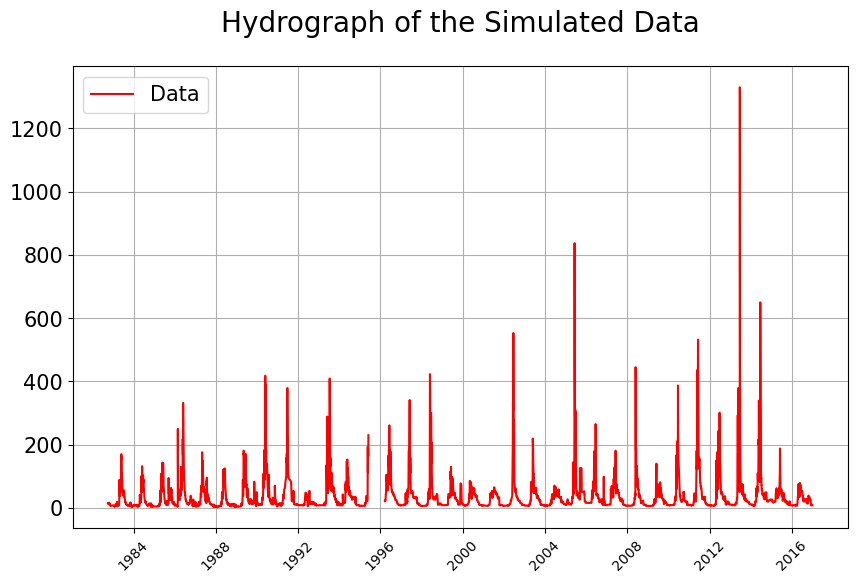

In [4]:
# A very simple line plot can be generated as shown below
# Just plotting the simulated data from the first station
visuals.plot(
    df = DATAFRAMES["DF_OBSERVED"].iloc[:, [0]],
    title='Hydrograph of the Simulated Data',
    grid=True,
)

...and combined observed and simulated data - 

Number of simulated data columns: 2
Number of linewidths provided is less than the number of columns. Number of columns : 3. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 3. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 3. Number of legends provided is:  1. Applying Default legend names


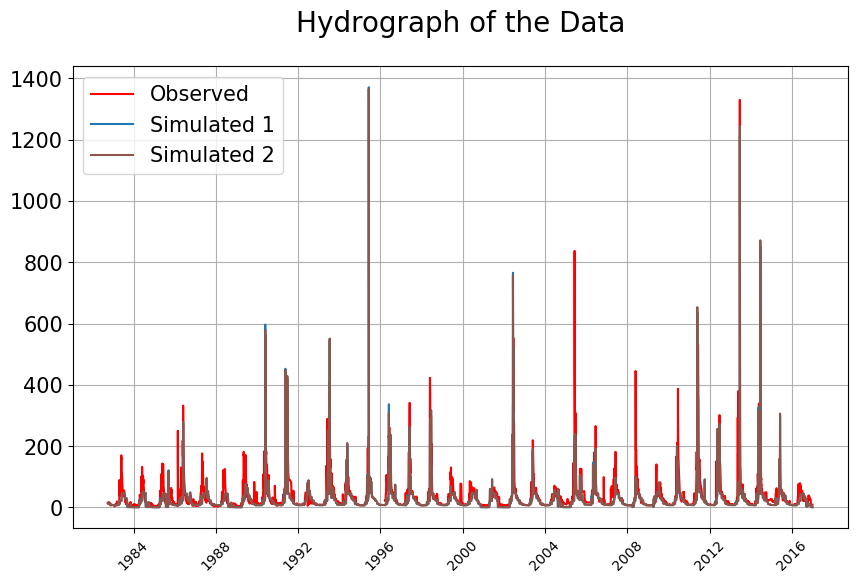

In [5]:
# Plotting both Observed and Simulated combined
visuals.plot(
    merged_df = DATAFRAMES["DF_MERGED"].iloc[:, [0, 1, 2]],
    title='Hydrograph of the Data',
    grid=True,
)

Lets zoom into a few years, say 2000-2005

Number of simulated data columns: 2
Number of linewidths provided is less than the number of columns. Number of columns : 3. Number of linewidths provided is:  1. Defaulting to 1.5
Number of linestyles provided is less than the number of columns. Number of columns : 3. Number of linestyles provided is:  1. Defaulting to solid lines (-)
Number of legends provided is less than the number of columns. Number of columns : 3. Number of legends provided is:  1. Applying Default legend names


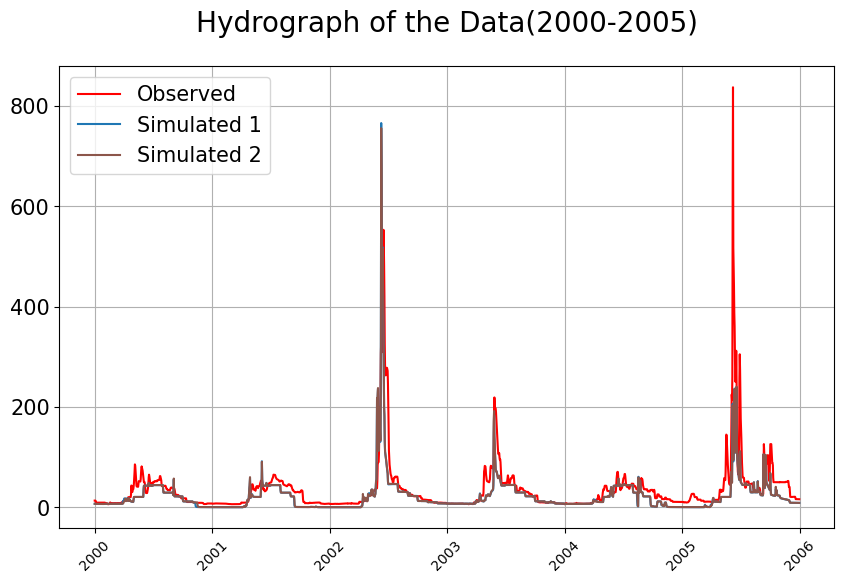

In [6]:
visuals.plot(
    merged_df = DATAFRAMES["DF_MERGED"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1, 2]],
    title='Hydrograph of the Data(2000-2005)',
    grid=True,
)

We are also able to plot just the simulated data in cases where we are not able to obtain them already merged together. This way we are not limited to a merged dataframe. Youd simply pass it in the way youd pass in merged. except you pass it into sim_df

The plot function also gives us complete control of the plot parameters. It allows you the flexibility to change the line colors, line width, axis labels, add grid lines, each plots title, the line legends and much more. There also exists an option to save the files as png images each with its own distinct name! 

All the posibilities can be found over at the documentation website linked [here](https://nhs-postprocessing.readthedocs.io/en/latest/api/postprocessinglib.evaluation.visuals.plot.html#postprocessinglib.evaluation.visuals.plot). Some examples of these are shown below:

Number of simulated data columns: 2
Number of linewidths provided is less than the number of columns. Number of columns : 3. Number of linewidths provided is:  1. Defaulting to 1.5


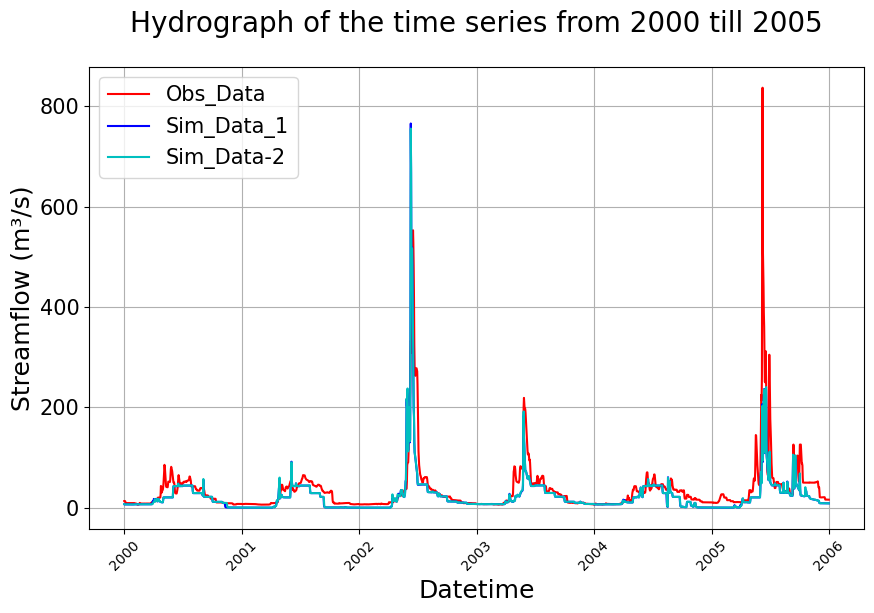

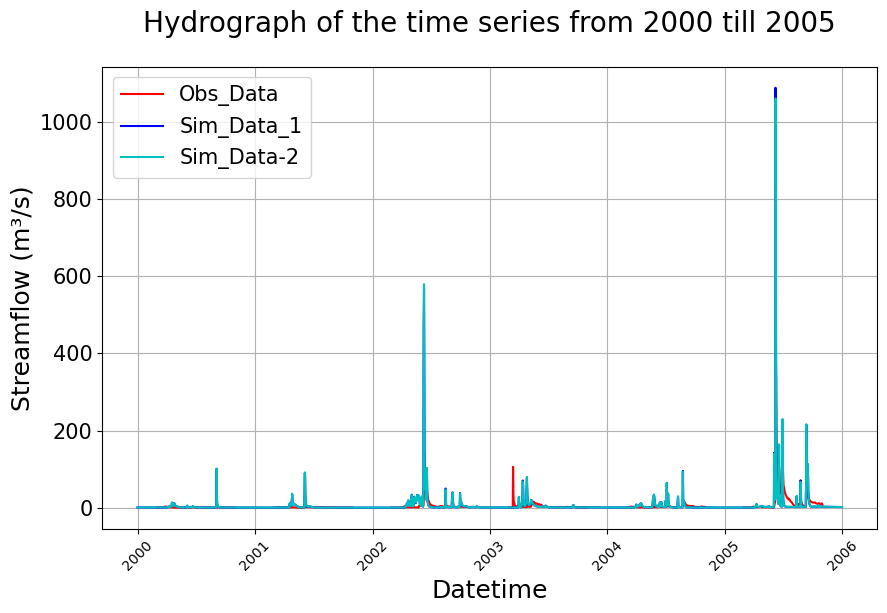

In [7]:
# Changing the default naming conventions
visuals.plot(
    merged_df =DATAFRAMES["DF_MERGED"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1, 2, 3, 4, 5]],
    title='Hydrograph of the time series from 2000 till 2005',
    linestyles=('r-', 'b-', 'c-'),
    legend=('Obs_Data', 'Sim_Data_1','Sim_Data-2'),
    labels=('Datetime', 'Streamflow'),
    grid=True,
    )

Number of simulated data columns: 2
Number of legends provided is less than the number of columns. Number of columns : 3. Number of legends provided is:  1. Applying Default legend names


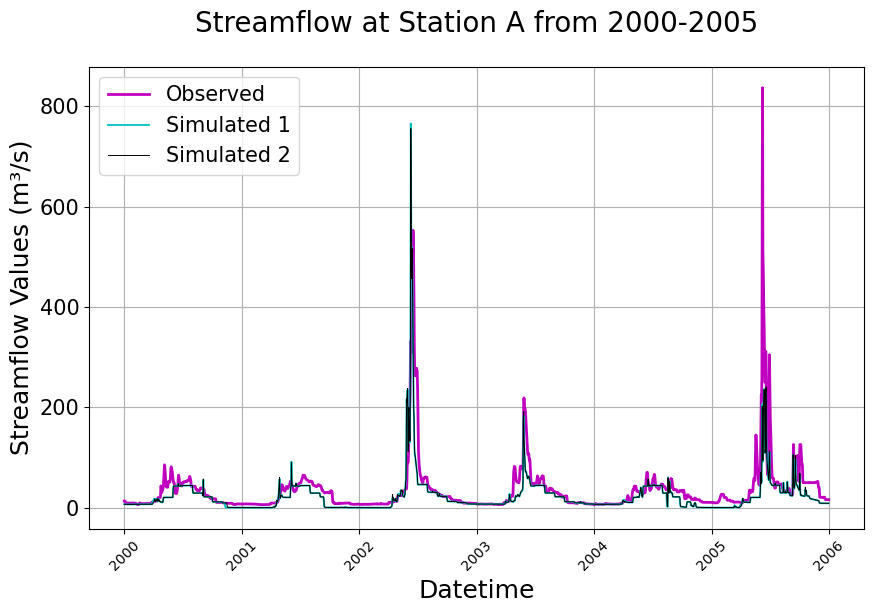

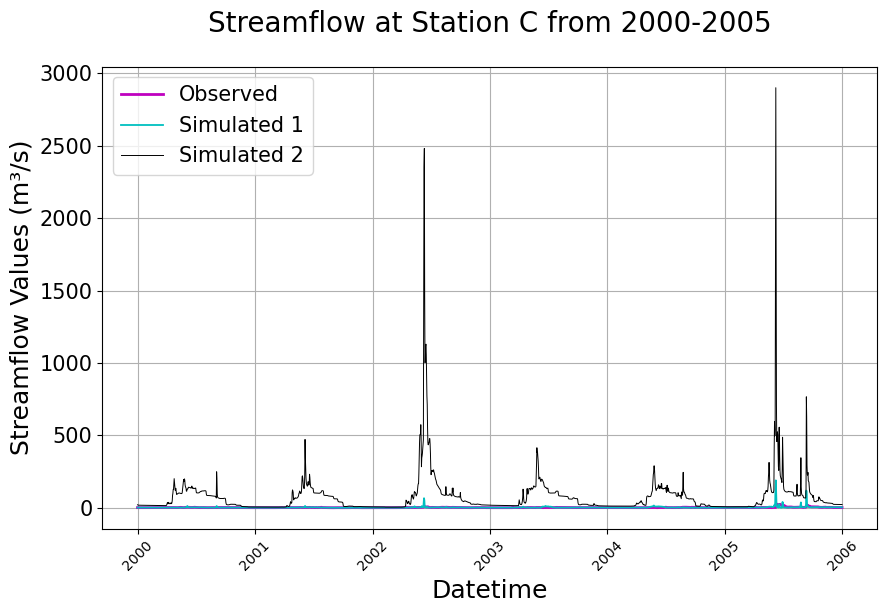

In [8]:
# Including the metrics in the plots for the 1st and 4th Stations
visuals.plot(
    merged_df =DATAFRAMES["DF_MERGED"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1, 2, 6, 7, 8]],
    # including multiple plot titles
    title=['Streamflow at Station A from 2000-2005', 'Streamflow at Station C from 2000-2005'],
    fig_size=(10, 6),
    linestyles=['m-', 'c-', 'k-'],
    labels=['Datetime', 'Streamflow Values'],
    linewidth=(2, 1.3, 0.7),
    # include metrics
    metrices = ['KGE', 'RMSE', 'NSE'],
    grid=True,
    # To save, uncomment the two lines below
    # save = True, 
    # save_as = [station_a(2000-2005), station_b(2000-2005)],
    # The two images will be saved as png files with names as entered above in the current directory
    )

### BOUNDED PLOTS

Another really important plot is the bounded plot. The bounded plot is much like the line plot except it allows you to compare not just exact values but also the range of values. Within the MESH models evaluations, we use this when aggregating the data into days of the month, months of the year, etc. Its especially useful when trying to guage how accurate the range of values compared to say its median or mean for example. An exmaple is shown below

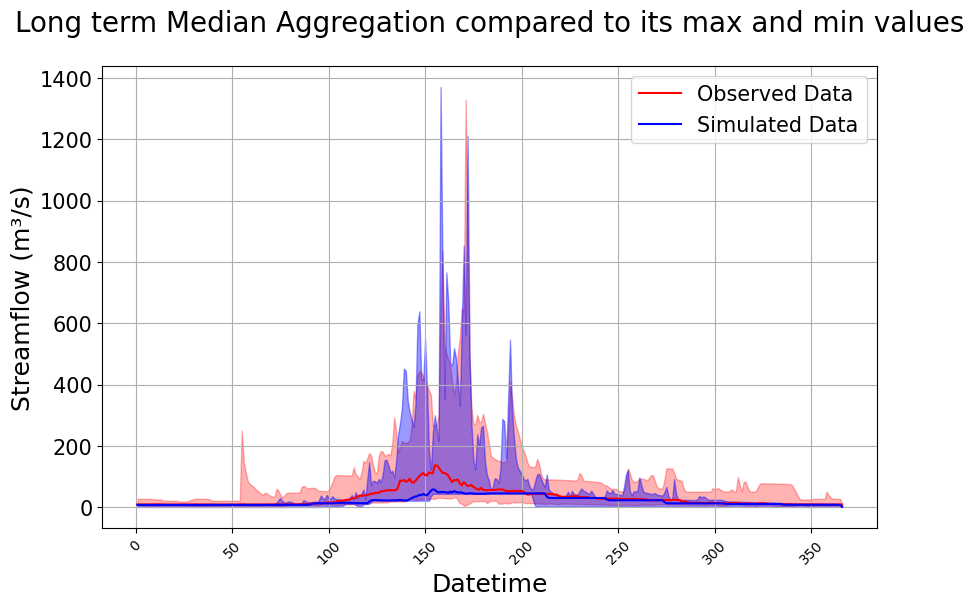

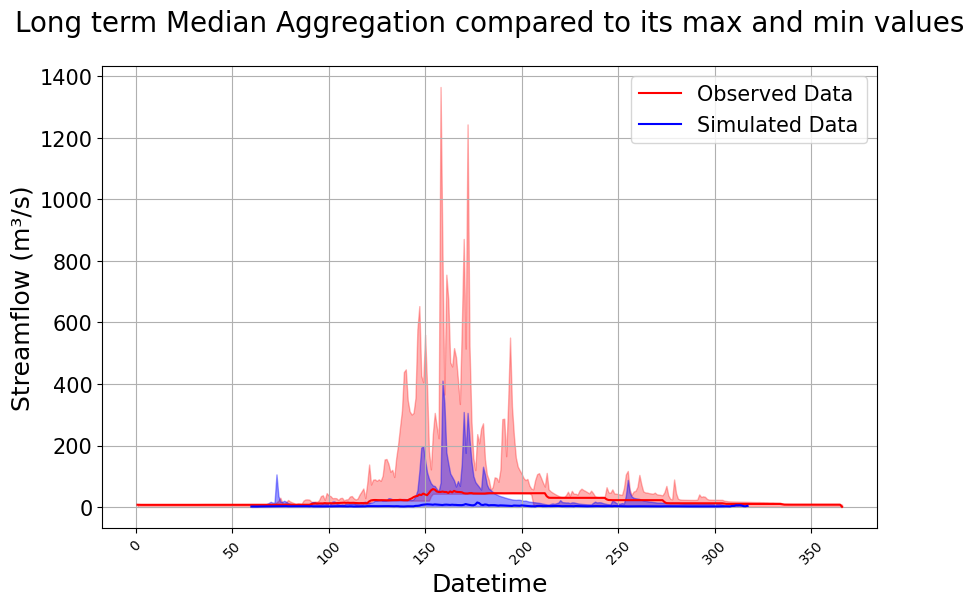

In [9]:
visuals.bounded_plot(
    lines = DATAFRAMES["LONG_TERM_MEDIAN"].iloc[:, [0,1, 2, 3]],
    upper_bounds = [DATAFRAMES["LONG_TERM_MAX"].iloc[:, [0,1,2,3]]],
    lower_bounds = [DATAFRAMES["LONG_TERM_MIN"].iloc[:, [0,1,2,3]]],
    linestyles=['b', 'r-'],
    labels=['Datetime', 'Streamflow'],
    grid=True,
    transparency = [0.4, 0.3],
    title = 'Long term Median Aggregation compared to its max and min values'
    )

As you can see above, we compare the median of the long term aggregation to its max and min values. Below, lets compare it to the 25th and 75th Quartile values

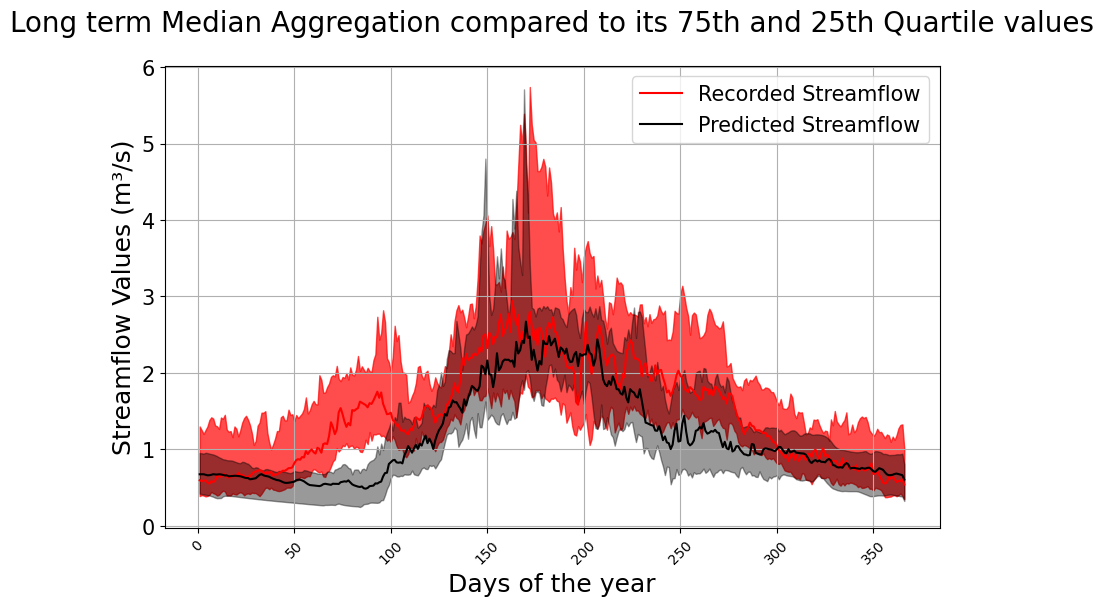

In [10]:
visuals.bounded_plot(
  lines = DATAFRAMES["LONG_TERM_MEDIAN"].iloc[:, [6,7]],
  upper_bounds = [DATAFRAMES["LONG_TERM_Q75"].iloc[:, [6,7]]],
  lower_bounds = [DATAFRAMES["LONG_TERM_Q25"].iloc[:, [6,7]]],
  title=['Long term Median Aggregation compared to its 75th and 25th Quartile values'],
  legend = ['Predicted Streamflow','Recorded Streamflow'],
  linestyles=['k', 'r-'],
  labels=['Days of the year', 'Streamflow Values'],
  transparency = [0.4, 0.7],
  grid = 'True'
#   To save, uncomment the two lines below
#   save = True,
#   save_as = "b_plot_1", dir= '../b_plots'
)

We can also use multiple bounds.

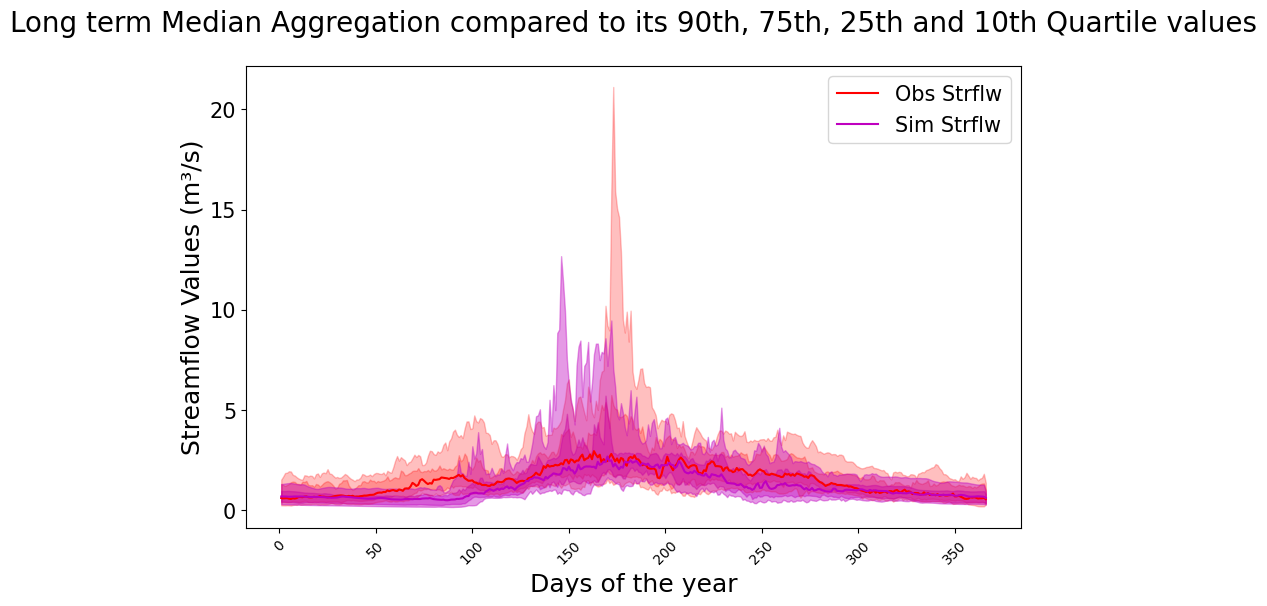

In [11]:
visuals.bounded_plot(
  lines = DATAFRAMES["LONG_TERM_MEDIAN"].iloc[:, [6,7]],
  upper_bounds = [DATAFRAMES["LONG_TERM_Q75"].iloc[:, [6,7]], DATAFRAMES["LONG_TERM_Q90"].iloc[:, [6,7]]],
  lower_bounds = [DATAFRAMES["LONG_TERM_Q25"].iloc[:, [6,7]], DATAFRAMES["LONG_TERM_Q10"].iloc[:, [6,7]]],
  title=['Long term Median Aggregation compared to its 90th, 75th, 25th and 10th Quartile values'],
  legend = ['Sim Strflw','Obs Strflw'],
  linestyles=['m-', 'r-'],
  labels=['Days of the year', 'Streamflow Values'],
  transparency = [0.4, 0.25],
)

### SCATTER PLOTS

The library provides us with two types of scatter plots. You select the one you want based on the inputs you pass into it. 

The first kind directly compares simulated or predcicted data (i.e., data generated by using the models) to actual oberved or measure data. It is used to visually show how accurately the model predicts the data. The closer the points are to the 45 degree line the more accurate the model is. Its is also used to show areas and time periods where the data does better which might point to a different problem such as weather anomalies, instrument errors, etc.

An example is shown below

Number of simulated data columns: 2
Number of markerstyles provided is less than the number of columns. Number of columns : 2. Number of markerstyles provided is:  1. Using Default Markerstyles.


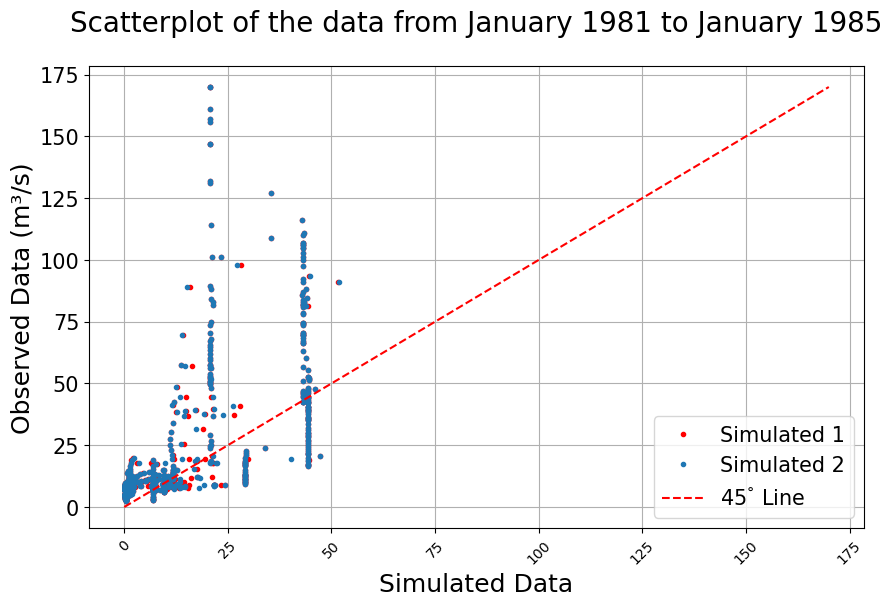

In [4]:
visuals.scatter(merged_df = DATAFRAMES['DF_MERGED']['1981-01-01':'1985-01-31'].iloc[:, [0, 1, 2]],
               grid = True,
               labels = ("Simulated Data", "Observed Data"),
               markerstyle = ['r.'],
               title = "Scatterplot of the data from January 1981 to January 1985",
               line45 = True,
#                metrices = ['KGE', 'RMSE'],
#                save = True,
               )

Similar to the other plots, there's ways to save the images using the save, save as and dir parameters passed into the function. It also allows the calculations of metrics as shown above. 

Another way to use the function would be using to show variations in certain metrics to show where the models performs better for that particular metric. You will have to provide some sort of shapefile and the parameters you'd need to plot it like x and y axis values, and the metric you'd be comparing. 

An example is shown below:

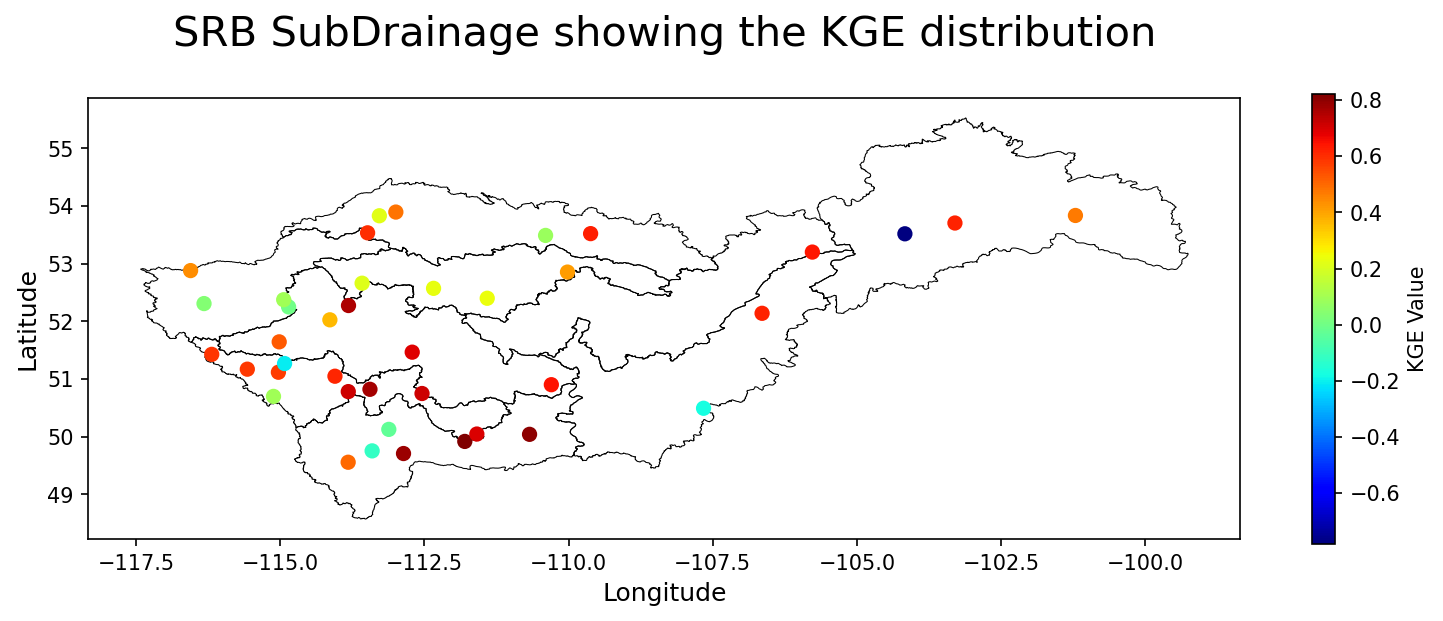

In [5]:
shapefile_path = r"SaskRB_SubDrainage2.shp"

visuals.scatter(shapefile_path = shapefile_path,
    title = "SRB SubDrainage showing the KGE distribution",
    x_axis = Stations["Lon"],
    y_axis = Stations["Lat"],
    metric = "KGE",
    fig_size = (24, 30),
    observed = DATAFRAMES["DF_OBSERVED"],
    simulated = DATAFRAMES["DF_SIMULATED_1"],
    labels=['Longitude', 'Latitude'],
#     cmap = 'viridis',
#     vmin = 0,
#     vmax=0.8,
)

The graph above shows the location of various stations and how accurately the models predict the streamflow by using the KGE (Kling - Gupta Efficiency) metric. You are also allowed to change the color scheme of your cmap, the maximum and minimum values of your color map and just like the ones above, you can also save using the respective parameters like the above visualizations tools.

### HISTOGRAM PLOTS

The histogram compares the distribution of observed and simulated data, providing insights into their statistical characteristics and variability. Its allows users to analyze the frequency distribution of hydrological data, assess model performance, and identify biases in the simulated dataset.

its features are very similar to that of the line plot where we are able to plot single data using the ``df`` argument and plot observed and simulated data. Some of these functionality is shown below

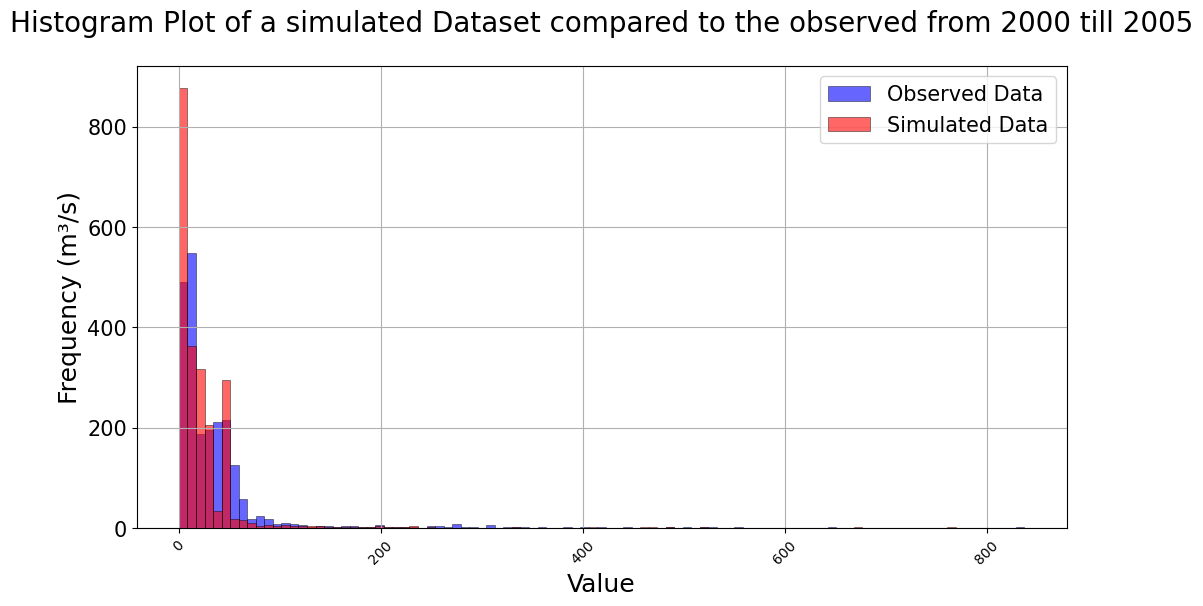

In [14]:
visuals.histogram(
    merged_df =DATAFRAMES["DF_MERGED"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1]],
    grid = True,
    title = "Histogram Plot of a simulated Dataset compared to the observed from 2000 till 2005",
)

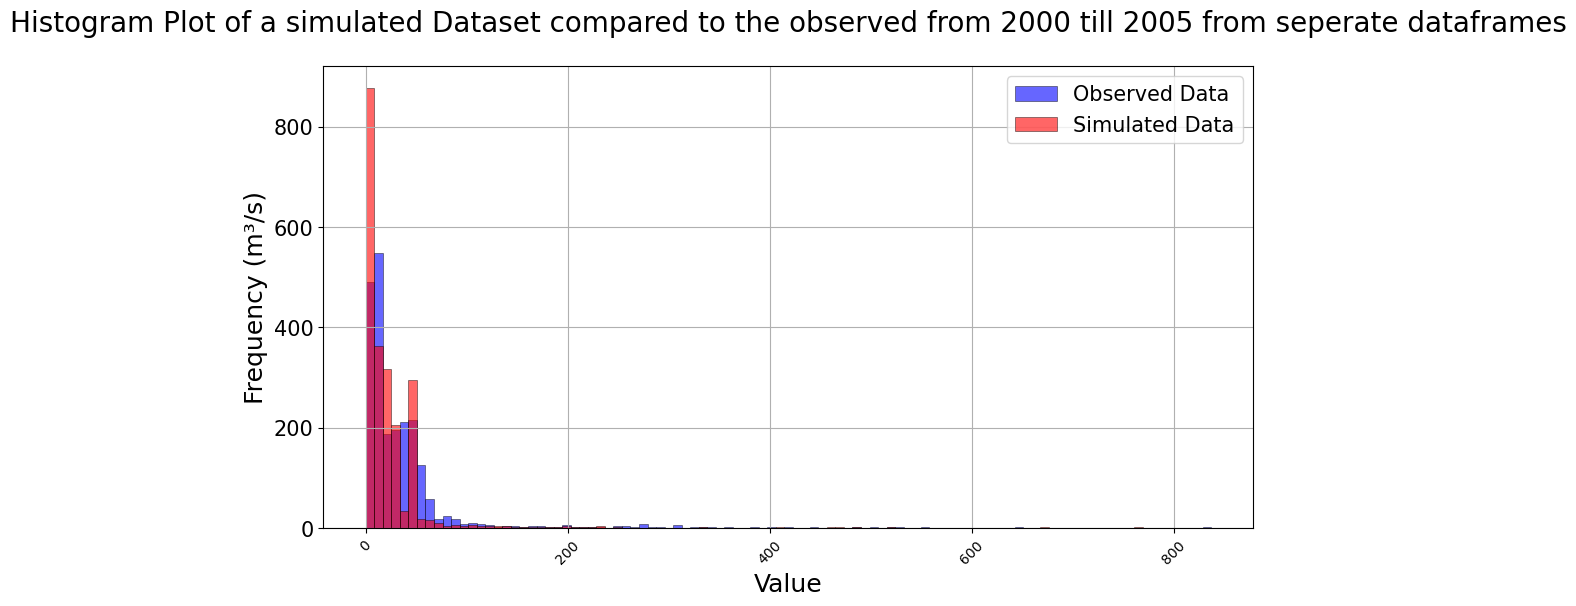

In [15]:
visuals.histogram(
    obs_df =DATAFRAMES["DF_OBSERVED"]['2000-01-01':'2005-12-31'].iloc[:, [0]],
    sim_df =DATAFRAMES["DF_SIMULATED_1"]['2000-01-01':'2005-12-31'].iloc[:, [0]],
    grid = True,
    title = "Histogram Plot of a simulated Dataset compared to the observed from 2000 till 2005 from seperate dataframes",
)

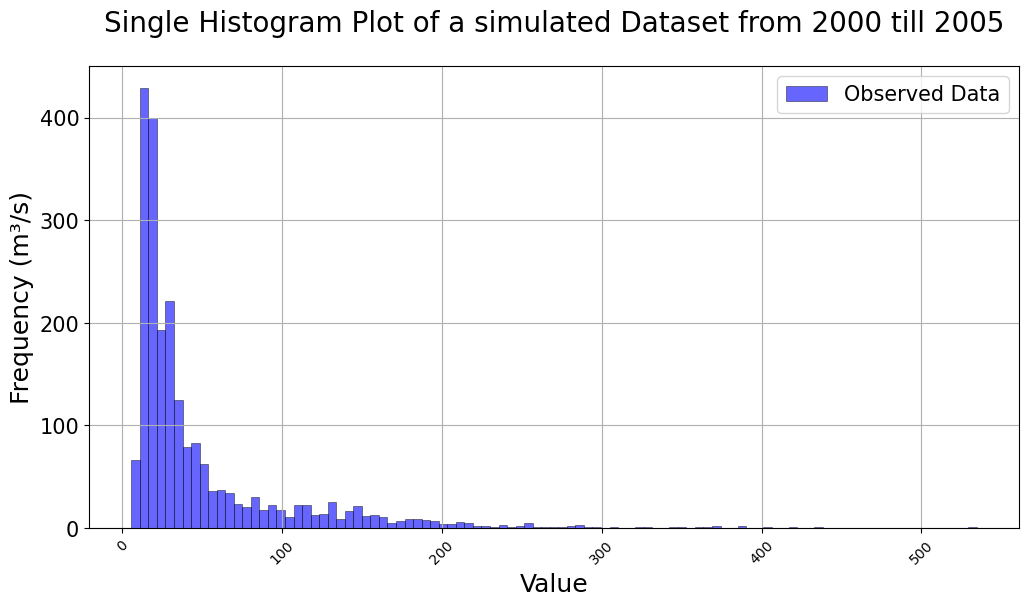

In [16]:
visuals.histogram(
    df =DATAFRAMES["DF_SIMULATED_1"]['2000-01-01':'2005-12-31'].iloc[:, [8]],
    grid = True,
    title = "Single Histogram Plot of a simulated Dataset from 2000 till 2005",
)

You are able to modify the numbers of bins/bars, you are able to specify if you want the data z-normalized as well as specify if you want the data normalized to form a probability density as shown below:

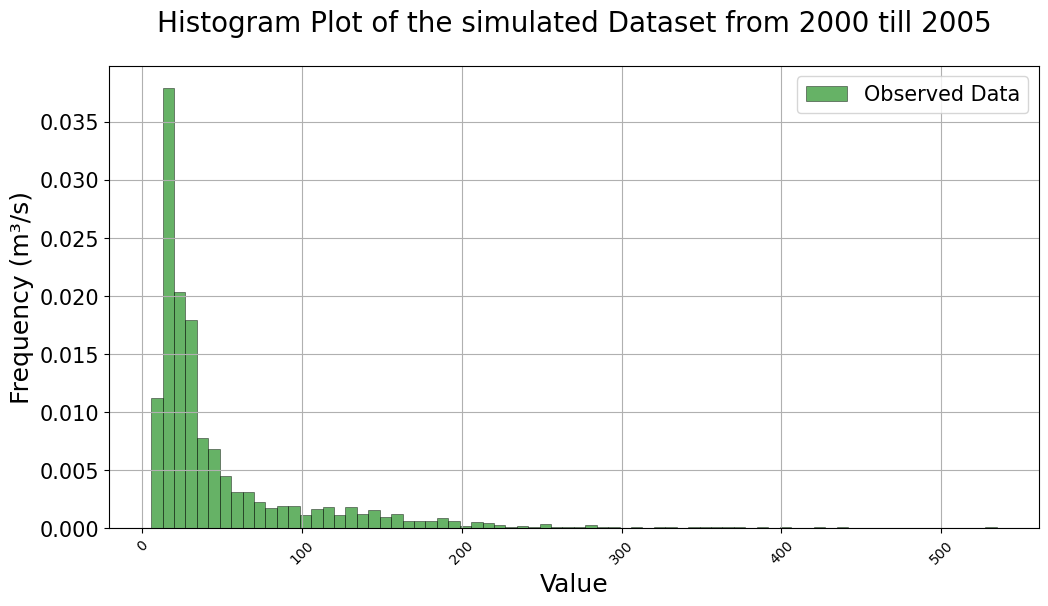

In [17]:
visuals.histogram(
    df =DATAFRAMES["DF_SIMULATED_1"]['2000-01-01':'2005-12-31'].iloc[:, [8]],
    grid = True,
    title = "Histogram Plot of the simulated Dataset from 2000 till 2005",
    prob_dens = True, bins = 75,
    colors = ['', 'g']
)

By setting the probability density to true, the plot gets normalized to a state where the area under the graph equals to 1. i.e the area of each bar summed up will equal 1.  

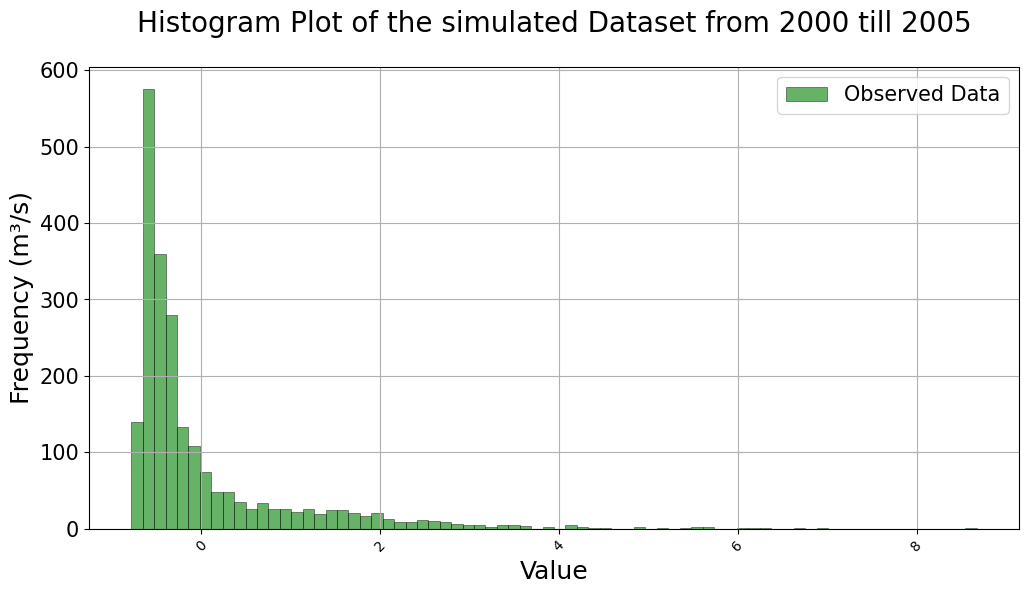

In [18]:
visuals.histogram(
    df =DATAFRAMES["DF_SIMULATED_2"]['2000-01-01':'2005-12-31'].iloc[:, [8]],
    grid = True,
    title = "Histogram Plot of the simulated Dataset from 2000 till 2005",
    z_norm = True, bins = 75,
    colors = ['', 'g']
)

As observed, the data has been z score normalized. 

As usual you are also able to modify the color, transparency of the bars and size of the figure, amongst others. You are also able to save the figures 

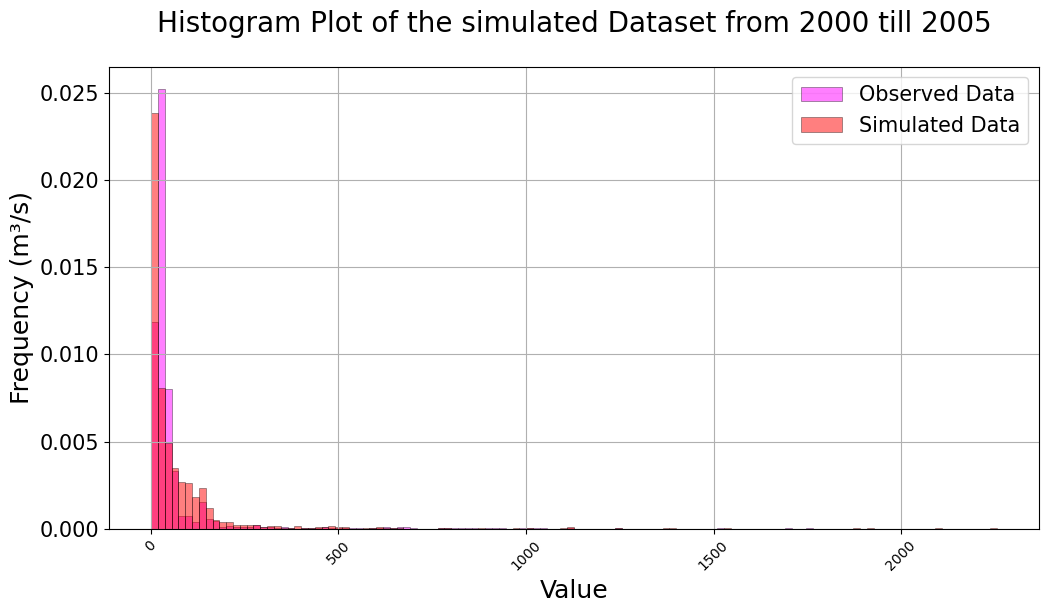

In [19]:
visuals.histogram(
    merged_df =DATAFRAMES["DF_MERGED"]['2000-01-01':'2005-12-31'].iloc[:, [9, 10]],
    grid = True,
    title = "Histogram Plot of the simulated Dataset from 2000 till 2005",
    prob_dens = True, bins = 125,
    colors = ['red', 'magenta'],
    transparency = 0.5,
#     save=True,
#     save_as="histogramplot_example",
#     dir = '../Figures'    
)

### QUANTILE QUANTILE PLOTS

The Quantile plot allow us to immediately see if the observed and simulated datsets - when plotted against each other - follow the normal distribution by comparing their quantiles i.e., we compare the quantiles of the simulated dataset to that of the observed and see how accurately they fall on the y = x line. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


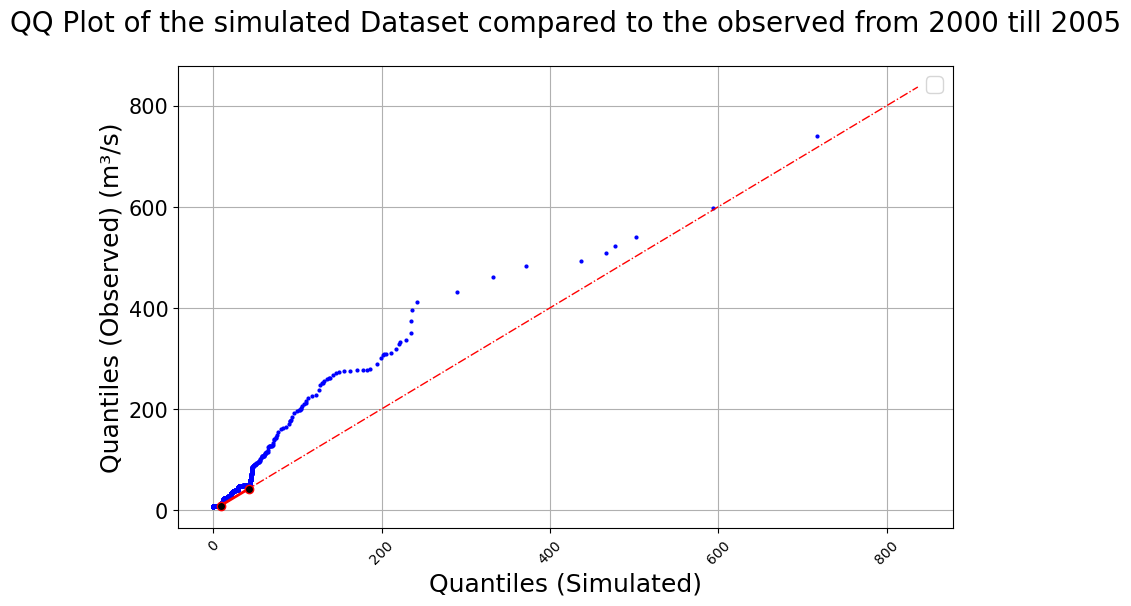

In [20]:
visuals.qqplot(
    merged_df =DATAFRAMES["DF_MERGED"]['2000-01-01':'2005-12-31'].iloc[:, [0, 1]],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    title="QQ Plot of the simulated Dataset compared to the observed from 2000 till 2005",
    grid = True
)

Our library also allows us to plot a quantile range within which certain qauntiles will exist. Its default is the interquartile range of the 25th to the 75th Quartile but you are able to adjust it to whatever you want and name it how ever you want. For example: 

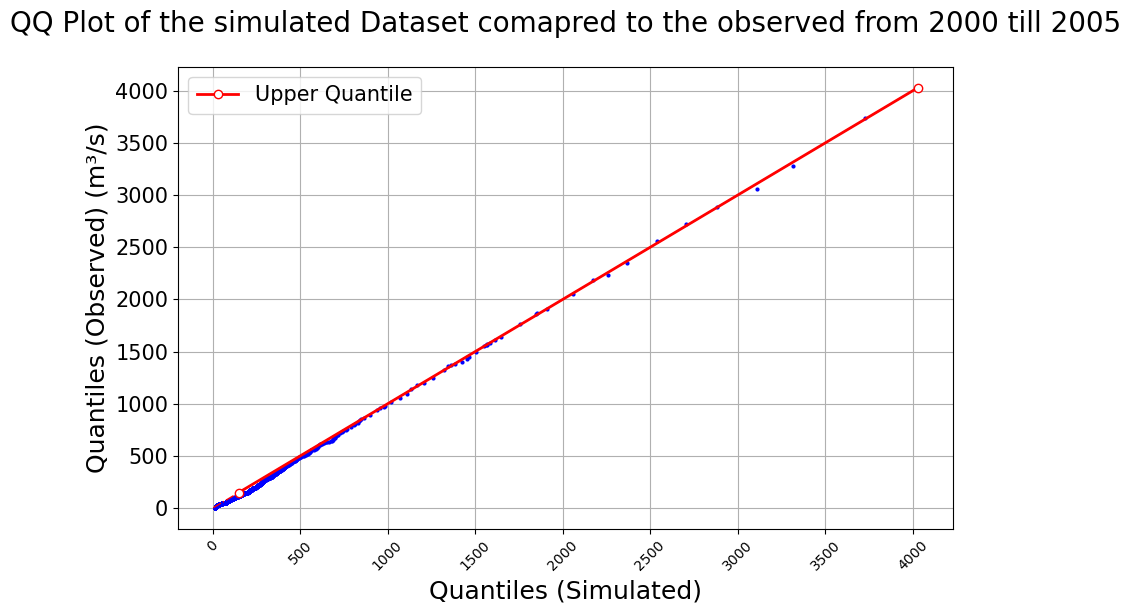

In [21]:
visuals.qqplot(
    merged_df =DATAFRAMES["DF_MERGED"]['2000-01-01':'2005-12-31'].iloc[:, [16, 17]],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    title="QQ Plot of the simulated Dataset comapred to the observed from 2000 till 2005",
    legend = True,
    quantile = [75, 100],
    q_labels= ['','','Upper Quantile'],
    grid = True
)

As usual you able to modify the shape, color and thickness of your lines as you see fit and you are able to save the images as well as shown in previous plots

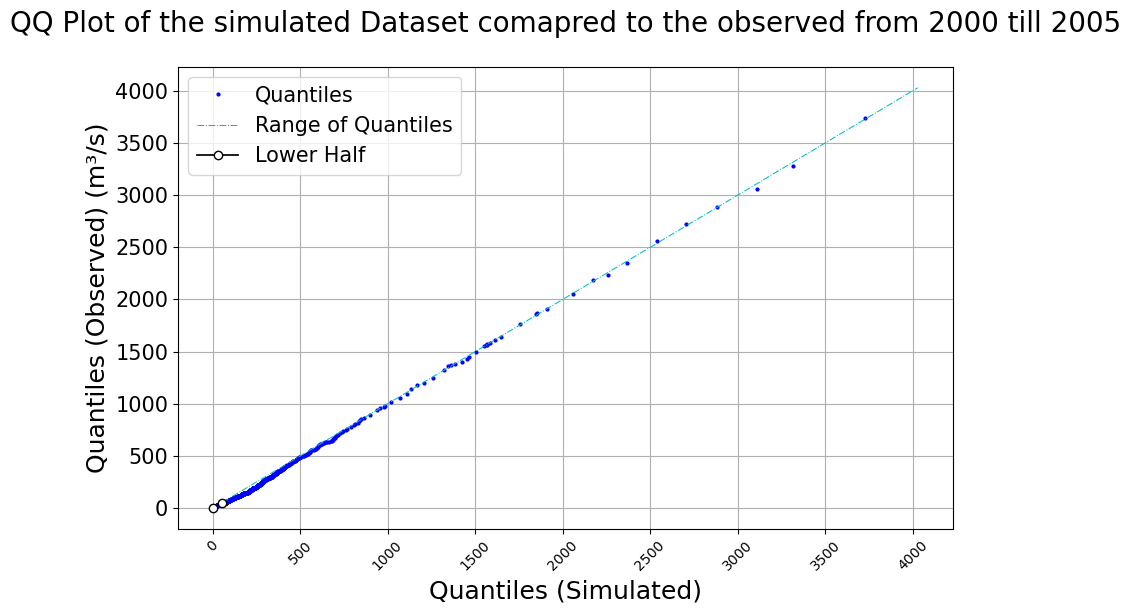

In [22]:
visuals.qqplot(
    merged_df =DATAFRAMES["DF_MERGED"]['2000-01-01':'2005-12-31'].iloc[:, [16, 17]],
    linestyle = ['bo','c-.','k-'],
    labels=["Quantiles (Simulated)", "Quantiles (Observed)"],
    title="QQ Plot of the simulated Dataset comapred to the observed from 2000 till 2005",
    linewidth = [.75, 1.25],
    legend = True,
    quantile = [0, 50],
    q_labels= ['Quantiles','Range of Quantiles','Lower Half'],
    grid = True,
#     save=True,
#     save_as="qqplot_example",
#     dir = '../Figures'
)

### FLOW DURATION CURVE

The Flow Duration Curve (FDC) is a graphical representation of the frequency distribution of flow values, showing the relationship between exceedance probability and streamflow magnitude. This function compares the observed and simulated data sets and generates the FDC for each column in the provided data. This is shown below:

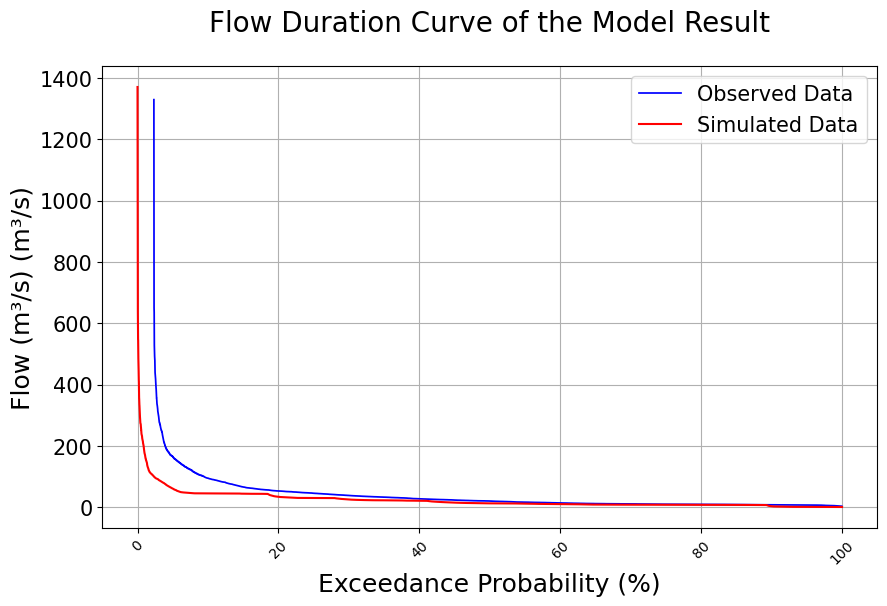

In [23]:
visuals.flow_duration_curve(
    merged_df = DATAFRAMES["DF_MERGED"].iloc[:, [0, 1]],
    title='Flow Duration Curve of the Model Result',
    grid = True
)

As usual you are able to modify the plot parameters as you see fit - everything from colors to names to labels names and plot size - and of course, you can save the images generated

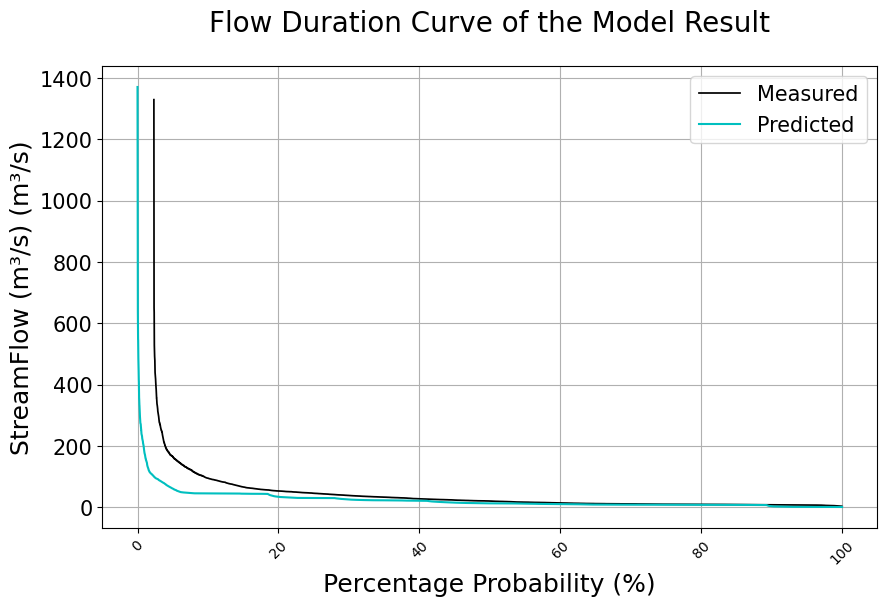

In [24]:
visuals.flow_duration_curve(
    merged_df = DATAFRAMES["DF_MERGED"].iloc[:, [0, 1]],
    title='Flow Duration Curve of the Model Result',
    legend=['Predicted','Measured'],
    labels=('Percentage Probability (%)', 'StreamFlow (m³/s)'),
    linestyles=('c-', 'k-'),
    grid = True,
#     save=True,
#     save_as="FDC_example",
#     dir = '../Figures'
)